In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import string

## Get the Data

In [282]:
df1 = pd.read_csv('/Users/dougmengistu/Documents/tweet1.csv')

In [283]:
df2 = pd.read_csv('/Users/dougmengistu/Documents/tweet2.csv')

In [284]:
df3 = pd.read_csv('/Users/dougmengistu/Documents/tweet3.csv')

In [285]:
df4 = pd.read_csv('/Users/dougmengistu/Documents/tweet4.csv')

In [286]:
df5 = pd.read_csv('/Users/dougmengistu/Documents/tweet5.csv')

In [287]:
df6 = pd.read_csv('/Users/dougmengistu/Documents/tweet6.csv')

In [288]:
df7 = pd.read_csv('/Users/dougmengistu/Documents/tweet7.csv')

In [289]:
df8 = pd.read_csv('/Users/dougmengistu/Documents/tweet8.csv')

In [290]:
df9 = pd.read_csv('/Users/dougmengistu/Documents/tweet9.csv')

**Concatinate the dataframes**

In [291]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [292]:
result = pd.concat(frames)

In [293]:
len(result.index)

846

**DATA**

In [344]:
result

,id (S),company (S),content (S),createdAt (S),keyword (S),sentiment (S),tweetId (N),user (S),userId (N)
0,cf842bca-b58e-4686-95e3-43f6f63c0a49,AIGInsurance,@aigkenham @AiG God says you don't need to wor...,not,AIG,positive,8.99687e+17,AidanStreet,4.807950e+07
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,positive,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,positive,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,positive,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,positive,8.99641e+17,Bar3lyL0gical,4.124504e+09
5,ce6a2a7b-caaf-4a9f-8768-634153458979,AIGInsurance,@SolKane12 @aigkenham @AiG As facts seem a goo...,not,AIG,negative,8.99693e+17,bytownbamboo,7.858963e+17
6,c57fa40d-b8db-42e0-8294-c74bdd7bbd32,GEICO,Join the GEICO team! See our latest #job openi...,neutral,GEICO,negative,8.99647e+17,GEICO_Jobs,2.013487e+08
7,e364f47b-93a5-4929-a0cd-55321ec7da0b,GEICO,"""The script made me cry""\n\n""Geico commercials...",negative,GEICO,positive,8.97944e+17,feelmybricep,1.107480e+09
8,09caf32f-dcbd-439d-ae68-9b4fd75d9f95,State Farm,@youaintnodancer @StateFarm Really? I have a d...,negative,StateFarm,negative,8.97945e+17,cynthisizer,2.367264e+07
9,5ab246c1-f5a0-4ad3-8772-df7290dc4ccd,AIGInsurance,"@aigkenham @AiG So you have no authority, beca...",not,AIG,positive,8.99695e+17,ctl1946,5.050340e+07


**Filter dataset**

In [345]:
result_clean = result[(result['createdAt (S)'] != 'not') | (result['createdAt (S)'] == 'nan')] 

In [346]:
result_clean.columns

Index(['id (S)', 'company (S)', 'content (S)', 'createdAt (S)', 'keyword (S)',
       'sentiment (S)', 'tweetId (N)', 'user (S)', 'userId (N)'],
      dtype='object')

In [347]:
result_clean.rename(index=str, columns={"content (S)": "tweets", "createdAt (S)":"sentiments", "sentiment (S)":"ignore"}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [348]:
len(result_clean.index)

516

In [349]:
result_clean

,id (S),company (S),tweets,sentiments,keyword (S),ignore,tweetId (N),user (S),userId (N)
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,positive,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,positive,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,positive,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,positive,8.99641e+17,Bar3lyL0gical,4.124504e+09
6,c57fa40d-b8db-42e0-8294-c74bdd7bbd32,GEICO,Join the GEICO team! See our latest #job openi...,neutral,GEICO,negative,8.99647e+17,GEICO_Jobs,2.013487e+08
7,e364f47b-93a5-4929-a0cd-55321ec7da0b,GEICO,"""The script made me cry""\n\n""Geico commercials...",negative,GEICO,positive,8.97944e+17,feelmybricep,1.107480e+09
8,09caf32f-dcbd-439d-ae68-9b4fd75d9f95,State Farm,@youaintnodancer @StateFarm Really? I have a d...,negative,StateFarm,negative,8.97945e+17,cynthisizer,2.367264e+07
10,45324e4b-6dfc-429f-b879-1f3572db8e5a,FarmersInsuranceGroup,I just checked in at Farmers Insurance Group w...,neutral,Farmers Insurance Group,positive,8.99676e+17,WhetuRussell,1.917430e+08
11,2bddeecd-ca4d-4305-b059-16f62923c4fc,AIGInsurance,RT @AIGinsurance: 600+ AIG employees & their f...,neutral,AIG,positive,8.99669e+17,zin_zay,4.887327e+08
12,da218f61-b3c6-4d30-a05b-58e8b1ea4202,State Farm,Well eclipse over. Back to connecting @StateFa...,positive,StateFarm,positive,8.99696e+17,SF_vwetzel,1.887301e+09


In [350]:
result_clean.describe()

,userId (N)
count,5.110000e+02
mean,1.434603e+17
std,3.137569e+17
min,1.036947e+07
25%,1.660497e+08
50%,1.206481e+09
75%,3.160977e+09
max,8.996746e+17


In [351]:
result_clean.columns

Index(['id (S)', 'company (S)', 'tweets', 'sentiments', 'keyword (S)',
       'ignore', 'tweetId (N)', 'user (S)', 'userId (N)'],
      dtype='object')

## Data Analysis

**Add tweet length for analysis**

In [352]:
result_clean['tweet_length'] = result_clean['tweets'].apply(str).apply(len)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Tweets per company**

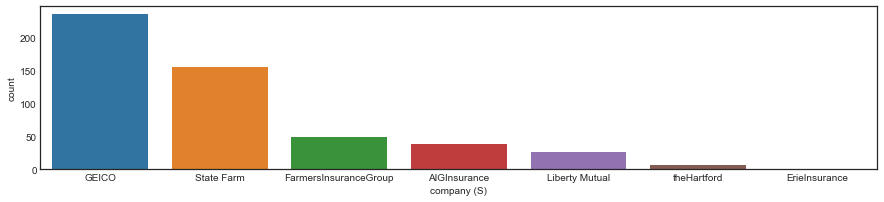

In [354]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,3))
sns.countplot(x='company (S)',data=result_clean)

**Tweet length per sentiment**

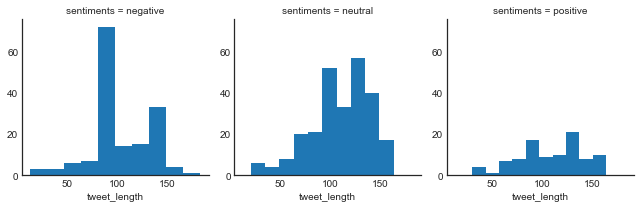

In [355]:
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(result_clean,col='sentiments')
g.map(plt.hist,'tweet_length')

**Sentiment per Company**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1343c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1138c3048>]], dtype=object)

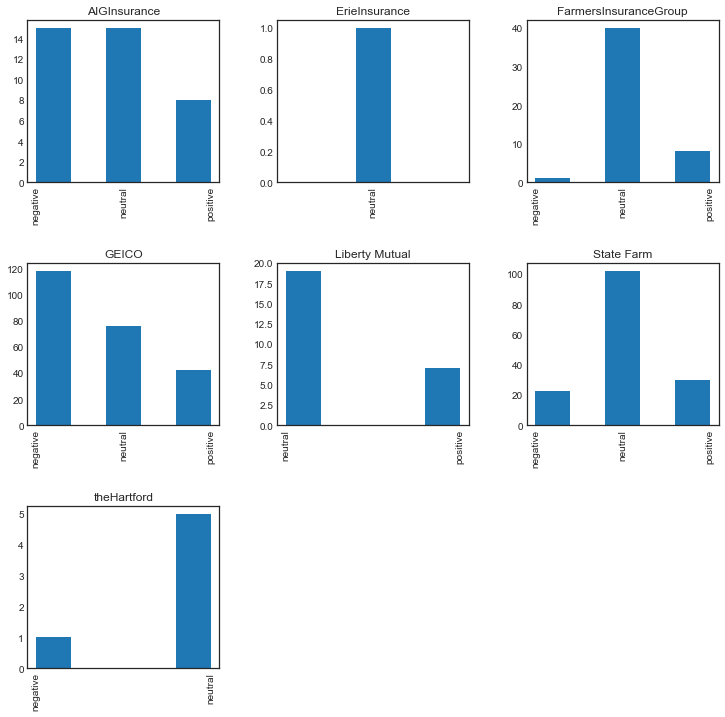

In [390]:
result_clean.hist(column='sentiments', by='company (S)', bins=5, figsize=(12,12))

## Preparing dataset for Machine Learning 

In [356]:
x = result_clean['tweets'].apply(str)

In [357]:
y = result_clean['sentiments'].apply(str)

In [358]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

**This function will take punctuations and stopwords out of the tweets**

In [359]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english')]
    return nostop

**This method will split training and testing datasets**

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

**Multinomial Naive Bayes models the word counts and adjusts the formula to word counts. **

In [361]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

** Use X_train (70% of tweets) and y_train (70% of sentiment) to train the model**

In [362]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict X_test (30% of the tweets) that were not used to train the model**

In [395]:
print(type(X_test))

<class 'pandas.core.series.Series'>


In [363]:
predictions = nb.predict(X_test)

In [364]:
from sklearn.metrics import confusion_matrix,classification_report

In [365]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 0  0  1  0]
 [ 0 36  5 14]
 [ 0  4 60 10]
 [ 0  0  8 17]]


             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.90      0.65      0.76        55
    neutral       0.81      0.81      0.81        74
   positive       0.41      0.68      0.52        25

avg / total       0.77      0.73      0.74       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Create a pipeline**

Import Tfidf Transformer which counts words and weights their effectes on the outcome 

Import stopwords, words that donot have any value example, is, he or has

Import Pipeline which create a pipeline for a dataset.

In [367]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [368]:
pipeline_MultinomialNB = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Define the tweets as 'X' and the sentiments as 'y' to split 

In [369]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

In [370]:
pipeline_MultinomialNB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10ce50e18>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [371]:
predictions_MultinomialNB = pipeline_MultinomialNB.predict(X_test)

In [372]:
print(confusion_matrix(y_test,predictions_MultinomialNB))
print(classification_report(y_test,predictions_MultinomialNB))

[[ 0  0  1  0]
 [ 0 31 20  4]
 [ 0  3 67  4]
 [ 0  0 15 10]]
             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         1
   negative       0.91      0.56      0.70        55
    neutral       0.65      0.91      0.76        74
   positive       0.56      0.40      0.47        25

avg / total       0.72      0.70      0.68       155



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Random Forest Classification Method **

In [373]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
pipeline_RandomForestClassifier = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [375]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [376]:
pipeline_RandomForestClassifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10ce50e18>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [377]:
predictions_RandomForestClassifier = pipeline_RandomForestClassifier.predict(X_test)

In [378]:
print(confusion_matrix(y_test,predictions_RandomForestClassifier))
print(classification_report(y_test,predictions_RandomForestClassifier))

[[ 1  0  0  0]
 [ 0 25 25  5]
 [ 0  0 67  7]
 [ 0  0 14 11]]
             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       1.00      0.45      0.62        55
    neutral       0.63      0.91      0.74        74
   positive       0.48      0.44      0.46        25

avg / total       0.74      0.67      0.66       155



In [396]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1, 1,10,50,70,100,1000], 'gamma':[1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [399]:
pipeline_grid = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GridSearchCV(SVC(),param_grid)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [400]:
pipeline_grid.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10ce50e18>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0))])

In [401]:
predictions_grid = pipeline_grid.predict(X_test)

In [402]:
print(confusion_matrix(y_test,predictions_grid))
print('\n')
print(classification_report(y_test,predictions_grid))

[[ 1  0  0  0]
 [ 0 32 18  5]
 [ 0  1 67  6]
 [ 0  1 12 12]]


             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         1
   negative       0.94      0.58      0.72        55
    neutral       0.69      0.91      0.78        74
   positive       0.52      0.48      0.50        25

avg / total       0.75      0.72      0.72       155

